In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr
from scipy import stats
from IPython.display import display

In [7]:
boston = pd.read_csv('p2_mod.csv')
X = boston.drop(columns='Y', axis=1)
y = boston['Y']
boston.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# This is the entropy method we defined in the Entropy workshop
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return np.sum(-p * np.log2(p) for p in probs)

# What is the entropy of the entire set?
print("Entire set entropy = %.2f" % entropy(y))

Entire set entropy = 0.76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [9]:
# Let's write some functions that calculates the entropy after splitting on a particular value

def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
    # This is doc string, used for documentation
    probs = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        probs.append(float(len(y_new))/len(X))  # Convert to float, because ints don't divide well
    return probs

def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) # Information gain equation

# Let's try calculating the entropy after splitting by all the values in "cap-shape"
new_entropy = proportionate_class_entropy(X["X1"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.02

Information gain of 0.02


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [10]:
# Now let's try doing the same when splitting based upon all values of "odor"
new_entropy = proportionate_class_entropy(X["X6"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.11

Information gain of 0.11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [11]:
# Now let's try doing the same when splitting based upon all values of "odor"
new_entropy = proportionate_class_entropy(X["X6"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.11

Information gain of 0.11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [12]:
for c in X.columns:
    new_entropy = proportionate_class_entropy(X[c], y)
    print("%s %.2f" % (c, entropy(y) - new_entropy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


X1 0.02
X2 0.00
X3 0.00
X4 0.00
X5 0.00
X6 0.11
X7 0.07
X8 0.05
X9 0.05
X10 0.04
X11 0.04
X12 0.58
X13 0.57
X14 0.57
X15 0.56
X16 0.54
X17 0.53
X18 0.20
X19 0.19
X20 0.19
X21 0.17
X22 0.17
X23 0.17


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BFE

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
!pip install mlxtend

In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [18]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   19.9s finished

[2022-03-23 18:36:42] Features: 22/1 -- score: 0.8106666666666668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   21.1s finished

[2022-03-23 18:37:03] Features: 21/1 -- score: 0.8108749999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    9.5s finished

[2022-03-23 18:37:13] Features: 20/1 -- score: 0.8110833333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [19]:
sbs.k_feature_idx_

(5,)

In [20]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [21]:
df

,feature_idx,avg_score
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.810125
22,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.810667
21,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.810875
20,"(0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 1...",0.811083
19,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, ...",0.811708
18,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 16, ...",0.812083
17,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 16, 17, ...",0.812167
16,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 16, 17, ...",0.812208
15,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 17, 18, ...",0.812333
14,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 17, 18, 19, 22)",0.812333


In [22]:
sbs.subsets_

{1: {'avg_score': 0.8196666666666667,
  'cv_scores': array([0.823625, 0.819125, 0.81625 ]),
  'feature_idx': (5,),
  'feature_names': ('5',)},
 2: {'avg_score': 0.8122083333333333,
  'cv_scores': array([0.813375, 0.81075 , 0.8125  ]),
  'feature_idx': (0, 5),
  'feature_names': ('0', '5')},
 3: {'avg_score': 0.8131666666666666,
  'cv_scores': array([0.8135  , 0.812375, 0.813625]),
  'feature_idx': (0, 5, 9),
  'feature_names': ('0', '5', '9')},
 4: {'avg_score': 0.8135833333333333,
  'cv_scores': array([0.812875, 0.81275 , 0.815125]),
  'feature_idx': (0, 2, 5, 9),
  'feature_names': ('0', '2', '5', '9')},
 5: {'avg_score': 0.8131666666666666,
  'cv_scores': array([0.81175, 0.81325, 0.8145 ]),
  'feature_idx': (0, 2, 5, 9, 18),
  'feature_names': ('0', '2', '5', '9', '18')},
 6: {'avg_score': 0.8119583333333334,
  'cv_scores': array([0.811375, 0.811125, 0.813375]),
  'feature_idx': (0, 2, 5, 9, 13, 18),
  'feature_names': ('0', '2', '5', '9', '13', '18')},
 7: {'avg_score': 0.812166666

Selected Features ID : (5,)


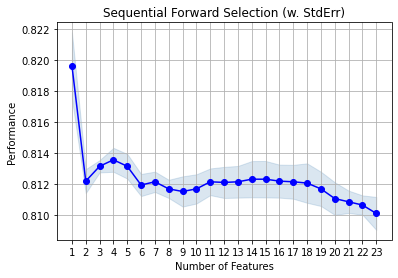

In [23]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [24]:
newdf = pd.DataFrame(X_train)
print(newdf)

             0         1         2         3         4         5         6   \
0     -0.672359  0.808159  0.184306  0.858114 -1.244658  0.014796  0.109694   
1     -1.057768 -1.237381  0.184306  0.858114 -0.811521  0.014796  0.109694   
2      0.098459  0.808159  3.971420 -1.054828  0.921024  0.014796  0.109694   
3     -0.826523 -1.237381 -1.078065  0.858114 -1.136374  0.014796  0.109694   
4     -0.286950  0.808159  0.184306  0.858114 -1.136374  0.014796  0.109694   
...         ...       ...       ...       ...       ...       ...       ...   
23995 -0.903605 -1.237381  0.184306  0.858114 -0.378385  0.014796  0.109694   
23996  0.252623 -1.237381 -1.078065  0.858114  0.163035  1.790286  1.779631   
23997 -0.903605 -1.237381 -1.078065  0.858114 -1.028090 -1.760694 -1.560243   
23998 -0.749441  0.808159  0.184306  0.858114 -1.136374  0.014796  0.109694   
23999 -0.055704  0.808159  0.184306 -1.054828  0.054751 -1.760694 -1.560243   

             7         8         9   ...        13 

In [25]:
selected = list(sbs.k_feature_idx_)

In [26]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

              5
0      0.014796
1      0.014796
2      0.014796
3      0.014796
4      0.014796
...         ...
23995  0.014796
23996  1.790286
23997 -1.760694
23998  0.014796
23999 -1.760694

[24000 rows x 1 columns]


In [27]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [28]:
from sklearn import svm
from sklearn.svm import SVC

In [29]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

82.13541666666667

In [30]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.29166666666666


KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

KNeighborsClassifier()

In [32]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 78.14583333333334


DT

In [33]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [34]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 81.29166666666666


RF

In [35]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [36]:
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

Random Forest Accuracy: 81.29166666666666


LR

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 81.29166666666666
